In [21]:
#Import package yang dibutuhkan
import tensorflow as tf
import zipfile
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.callbacks import EarlyStopping

from google.colab import files
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /content/rock_paper_scissors.zip

--2021-06-04 14:32:41--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/rock_paper_scissors.zip’

/content/rock_paper 100%[===================>] 307.92M  6.58MB/s    in 31s     

2021-06-04 14:33:12 (10.1 MB/s) - ‘/content/rock_paper_scissors.zip’ saved [322873683/322873683]



In [4]:
#Ekstrak file zip
zip_lokal = '/content/rock_paper_scissors.zip'
zip_ref = zipfile.ZipFile(zip_lokal, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
base_dir = '/content/rockpaperscissors/rps-cv-images'

In [6]:
os.listdir('/content/rockpaperscissors/rps-cv-images')

['scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [13]:
# Augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split=0.4)
 
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4)

In [14]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='training')
 
validation_generator = test_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [15]:
#Membangun model
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

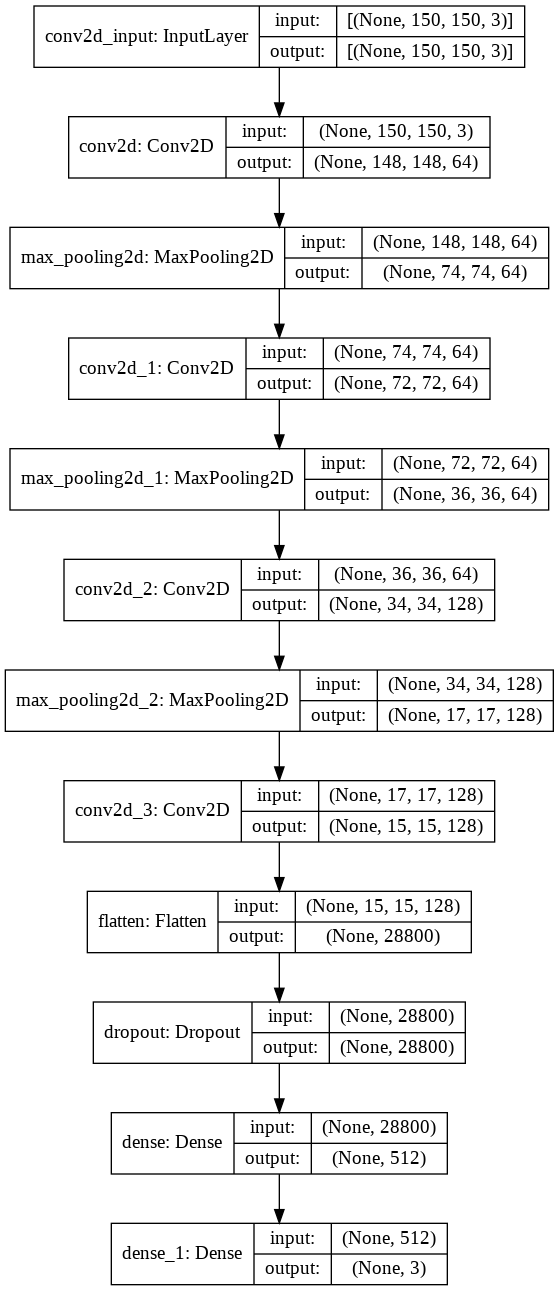

In [17]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [22]:
# compile model dengan 'stochastic gradient descent' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [25]:
# mendefinisikan early stopping dengan memperhatikan nilai validation loss
#(jika validation loss mulai meningkat setelah 5 epoch maka training akan dihentikan)
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)


# melatih model dengan model.fit 
history = model.fit(train_generator,
                    steps_per_epoch=25,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=20,
                    verbose=1,
                    callbacks=[early_stop])

Epoch 1/15
25/25 [==============================] - 67s 3s/step - loss: 0.2093 - accuracy: 0.9175 - val_loss: 0.0620 - val_accuracy: 0.9873
Epoch 2/15
25/25 [==============================] - 67s 3s/step - loss: 0.4163 - accuracy: 0.8675 - val_loss: 0.0455 - val_accuracy: 0.9919
Epoch 3/15
25/25 [==============================] - 67s 3s/step - loss: 0.1364 - accuracy: 0.9400 - val_loss: 0.0509 - val_accuracy: 0.9907
Epoch 4/15
25/25 [==============================] - 67s 3s/step - loss: 0.1830 - accuracy: 0.9362 - val_loss: 0.0639 - val_accuracy: 0.9850
Epoch 5/15
25/25 [==============================] - 67s 3s/step - loss: 0.2112 - accuracy: 0.9225 - val_loss: 0.0520 - val_accuracy: 0.9907
Epoch 6/15
25/25 [==============================] - 65s 3s/step - loss: 0.2202 - accuracy: 0.9429 - val_loss: 0.0587 - val_accuracy: 0.9931
Epoch 7/15
25/25 [==============================] - 65s 3s/step - loss: 0.2921 - accuracy: 0.9169 - val_loss: 0.0909 - val_accuracy: 0.9826
Epoch 00007: early s

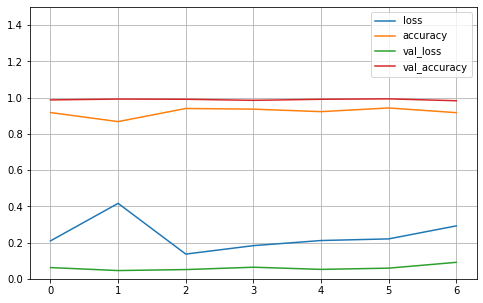

In [32]:
# Plot grafik loss dan accuracy
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1.5)

plt.show()

In [ ]:
# Menampilkan kelas/label
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}


Saving Rock-paper-scissors_(paper).png to Rock-paper-scissors_(paper) (2).png
Rock-paper-scissors_(paper).png 

paper


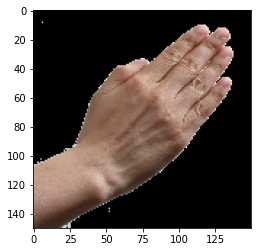

In [49]:
uploaded = files.upload()
 
for fig in uploaded.keys():
  img = image.load_img(fig, target_size=(150,150))
  img_plot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  class_ = model.predict(images, batch_size=32)

  print(fig,'\n')
  if class_[0][0]==1:
    print('paper')
  elif class_[0][1]==1:
    print('rock')
  else:
    print('scissors')